In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from scipy import sparse
from imblearn.over_sampling import RandomOverSampler
from mpl_toolkits.mplot3d import Axes3D

C:\Users\Pranavd\AppData\Local\Temp\ipykernel_20256\583899744.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("data.csv")
data.head()

,_id,studentId,personalityType,English,Geography,Civics,History,Biology,Physics,Chemistry,Maths,analyticalIndex,technicalIndex,creativeIndex,DOMINANT,CAUTIOUS,INSPIRING,SUPPORTIVE,title
0,1,7,ISTP,100.0,100.0,75.0,75.0,75.0,50.0,50.0,0.0,62.5,25.0,62.5,2.0,1.0,3.0,2.0,Software Programmer / Architect
1,2,9,ISFJ,100.0,100.0,50.0,100.0,100.0,75.0,100.0,75.0,75.0,50.0,75.0,2.0,1.0,3.0,2.0,Financial Manager
2,3,10,ENFP,100.0,100.0,100.0,100.0,75.0,100.0,75.0,0.0,87.5,37.5,75.0,2.0,1.0,4.0,1.0,Mathematics / Statistics Instructor
3,4,11,ESFP,100.0,100.0,50.0,100.0,100.0,100.0,75.0,0.0,50.0,25.0,75.0,1.0,0.0,3.0,4.0,Chemical Analyst
4,5,12,ENFP,100.0,100.0,75.0,100.0,100.0,100.0,100.0,100.0,87.5,75.0,75.0,2.0,2.0,2.0,2.0,Fashion Designer


In [3]:
data.columns

Index(['_id', 'studentId', 'personalityType', 'English', 'Geography', 'Civics',
       'History', 'Biology', 'Physics', 'Chemistry', 'Maths',
       'analyticalIndex', 'technicalIndex', 'creativeIndex', 'DOMINANT',
       'CAUTIOUS', 'INSPIRING', 'SUPPORTIVE', 'title'],
      dtype='object')

In [4]:
data.shape

(161, 19)

In [5]:
data.iloc[:,:18]

,_id,studentId,personalityType,English,Geography,Civics,History,Biology,Physics,Chemistry,Maths,analyticalIndex,technicalIndex,creativeIndex,DOMINANT,CAUTIOUS,INSPIRING,SUPPORTIVE
0,1,7,ISTP,100.0,100.0,75.0,75.0,75.0,50.0,50.0,0.0,62.5,25.0,62.5,2.0,1.0,3.0,2.0
1,2,9,ISFJ,100.0,100.0,50.0,100.0,100.0,75.0,100.0,75.0,75.0,50.0,75.0,2.0,1.0,3.0,2.0
2,3,10,ENFP,100.0,100.0,100.0,100.0,75.0,100.0,75.0,0.0,87.5,37.5,75.0,2.0,1.0,4.0,1.0
3,4,11,ESFP,100.0,100.0,50.0,100.0,100.0,100.0,75.0,0.0,50.0,25.0,75.0,1.0,0.0,3.0,4.0
4,5,12,ENFP,100.0,100.0,75.0,100.0,100.0,100.0,100.0,100.0,87.5,75.0,75.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,172,261,ENTP,100.0,75.0,50.0,25.0,100.0,100.0,50.0,0.0,37.5,12.5,62.5,1.0,1.0,2.0,2.0
157,173,277,ENTP,100.0,75.0,75.0,50.0,75.0,100.0,75.0,50.0,12.5,0.0,62.5,1.0,0.0,3.0,3.0
158,174,283,ESTP,75.0,100.0,50.0,100.0,100.0,100.0,100.0,100.0,87.5,62.5,62.5,2.0,0.0,4.0,2.0
159,175,284,ENFP,100.0,100.0,75.0,100.0,75.0,50.0,100.0,75.0,87.5,62.5,75.0,2.0,2.0,1.0,3.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              161 non-null    int64  
 1   studentId        161 non-null    int64  
 2   personalityType  161 non-null    object 
 3   English          155 non-null    float64
 4   Geography        155 non-null    float64
 5   Civics           155 non-null    float64
 6   History          155 non-null    float64
 7   Biology          155 non-null    float64
 8   Physics          155 non-null    float64
 9   Chemistry        155 non-null    float64
 10  Maths            155 non-null    float64
 11  analyticalIndex  158 non-null    float64
 12  technicalIndex   158 non-null    float64
 13  creativeIndex    158 non-null    float64
 14  DOMINANT         158 non-null    float64
 15  CAUTIOUS         158 non-null    float64
 16  INSPIRING        158 non-null    float64
 17  SUPPORTIVE      

In [7]:
data.describe()

,_id,studentId,English,Geography,Civics,History,Biology,Physics,Chemistry,Maths,analyticalIndex,technicalIndex,creativeIndex,DOMINANT,CAUTIOUS,INSPIRING,SUPPORTIVE
count,161.000000,161.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,90.782609,118.745342,85.483871,85.000000,69.838710,72.419355,87.258065,86.935484,83.387097,31.612903,59.335443,40.506329,57.990506,1.696203,1.443038,2.430380,1.993671
std,51.573212,97.595612,18.435340,20.465365,23.613633,22.644592,17.415786,18.754974,17.626495,30.161554,20.441811,21.876098,14.053070,1.208826,1.197097,1.477505,1.393784
min,1.000000,-135.000000,25.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,44.000000,75.000000,75.000000,50.000000,50.000000,75.000000,75.000000,75.000000,0.000000,50.000000,25.000000,50.000000,1.000000,0.000000,1.000000,1.000000
50%,93.000000,102.000000,100.000000,100.000000,75.000000,75.000000,100.000000,100.000000,75.000000,25.000000,62.500000,37.500000,62.500000,2.000000,1.000000,2.000000,2.000000
75%,136.000000,217.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,75.000000,62.500000,62.500000,2.000000,2.000000,3.000000,3.000000
max,176.000000,284.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,87.500000,100.000000,75.000000,6.000000,6.000000,7.000000,5.000000


In [8]:
for i in range(0,data.shape[1]):
    print("------------------------------------------")
    print("Unique values for " + data.columns[i])
    print("Number of Unique Values: ",len(np.unique(data.iloc[:,i])))
    print("------------------------------------------")
    print(data.iloc[:,i].unique())

------------------------------------------
Unique values for _id
Number of Unique Values:  161
------------------------------------------
[  1   2   3   4   5   6   8   9  10  11  12  13  14  16  17  18  19  20
  21  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  82  83
  84  85  86  87  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 116 117 118 120 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176]
------------------------------------------
Unique values for studentId
Number of Unique Values:  154
------------------------------------------
[   7    9   10   11   12   13   14   15   16   17   18   19   2

In [9]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x.shape

(161, 18)

C:\Users\Pranavd\AppData\Local\Temp\ipykernel_20256\823103717.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


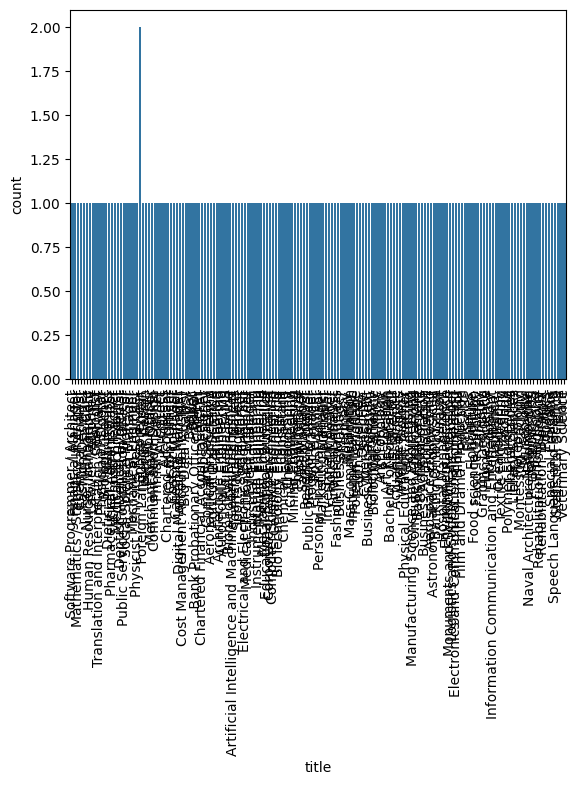

In [10]:
chart = sns.countplot(x=y)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [11]:
warnings.filterwarnings("ignore")

In [12]:
X = OneHotEncoder().fit_transform(x)
Y = y.copy(deep=True)

In [13]:
X

<161x431 sparse matrix of type '<class 'numpy.float64'>'
	with 2898 stored elements in Compressed Sparse Row format>

In [14]:
X2 = StandardScaler(with_mean=False).fit_transform(X)
y2 = y.copy(deep=True)
X2.shape

(161, 431)

In [15]:
y_trans = y.copy(deep=True)
y_trans

0          Software Programmer / Architect
1                        Financial Manager
2      Mathematics / Statistics Instructor
3                         Chemical Analyst
4                         Fashion Designer
                      ...                 
156                       Special Educator
157            Speech Language and Hearing
158                    Statistical Science
159                                  Unani
160                     Veterinary Science
Name: title, Length: 161, dtype: object

In [16]:
Y1=LabelEncoder().fit_transform(y_trans)
Y2=np.asarray(y_trans)
Y2

array(['Software Programmer / Architect', 'Financial Manager',
       'Mathematics / Statistics Instructor', 'Chemical Analyst',
       'Fashion Designer', 'Nurse / Human Care',
       'Human Resources Management', 'Lawyer / Attorney', 'Geologist',
       'Translation and Interpretation Specialist', 'Physician / Doctor',
       'Biology Teacher', 'Dietician / Nutritionists',
       'Pharmaceutical Administrator', 'Chemistry Teacher',
       'Medical Technologist', 'Dentist / Dental Hygienist',
       'Public Service Commission Officer', 'Social Science Professor',
       'Project Manager', 'Mechanical Engineer',
       'Physicist / Physics Researcher', 'Entrepreneur',
       ' Foreign Language Expert', 'Interior design', 'Psychologists',
       'Merchant Navy Officer', 'Communication Design', 'Primary Teacher',
       'Architect', 'Air Hostess', 'Chartered Accountant',
       'Custom Officer', 'Cost Accountant', 'Category Manager',
       'Digital Marketing Manager', 'Cost Management A

In [17]:
# Technology and Engineering
technology_and_engineering = [
    "Software Programmer / Architect",
    "Geologist",
    "Project Manager",
    "Mechanical Engineer",
    "Physicist / Physics Researcher",
    "Aeronautical Engineering",
    "Agricultural Science",
    "Architecture Engineering",
    "Automobile Engineering",
    "Biomedical Engineering",
    "Artificial Intelligence and Machine Learning Engineer",
    "Computer Science Engineering",
    "Electrical and Electronics Engineering",
    "Medical Electronics Engineer",
    "Industrial Engineering",
    "Instrumentation Engineering",
    "Marine Engineering",
    "Mechanical Engineering",
    "Ceramic Engineering",
    "BioTechnology Engineering",
    "Civil Engineering",
    "Mining Engineering",
    "Chemical Engineering",
    "Computer Applications",
    "Aerospace Engineering",
    "Electronics and Communication Engineering",
    "Textile Engineering",
    "Polymer Engineering",
    "Naval Architecture Engineering",
    "Robotics"
]

# Healthcare and Medicine
healthcare_and_medicine = [
    "Nurse / Human Care",
    "Physician / Doctor",
    "Medical Technologist",
    "Dentist / Dental Hygienist",
    "Dietician / Nutritionists",
    "Pharmaceutical Administrator",
    "Physiotherapy",
    "Ayurveda BAMS",
    "Medical Electronics Engineer",
    "Pharmacy",
    "Hospital Management",
    "Homeopathy",
    "Naturopathy",
    "Siddha",
    "Veterinary Science",
    "Rehabilitation Therapist",
    "Speech Language and Hearing"
]

# Business and Management
business_and_management = [
    "Financial Manager",
    "Human Resources Management",
    "Entrepreneur",
    "Merchant Navy Officer",
    "Chartered Accountant",
    "Cost Accountant",
    "Category Manager",
    "Digital Marketing Manager",
    "Banker",
    "Chartered Financial Accountant(CFA)",
    "Company Secretary",
    "Event Manager",
    "Corporate Intelligence Analyst",
    "Bank Management",
    "Business Administration",
    "Business Manager",
    "Product Manager",
    "Marketing Manager",
    "Investment Banker",
    "Sales Manager",
    "Logistics and Supply Chain Manager",
    "Insurance"
]

# Education and Teaching
education_and_teaching = [
    "Mathematics / Statistics Instructor",
    "Biology Teacher",
    "Chemistry Teacher",
    "Foreign Language Expert",
    "Primary Teacher",
    "Educational School Counsellor",
    "Physical Education Teacher",
    "Mass Communication",
    "Bachelor of Education",
    "Montessori Teaching",
    "Liberal Studies",
    "Special Educator"
]

# Creative and Design
creative_and_design = [
    "Fashion Designer",
    "Communication Design",
    "Interior design",
    "Web Designer",
    "Choreography",
    "Animation",
    "Art Restoration",
    "Fine Arts",
    "Graphic Designing",
    "Performing Arts",
    "Photography"
]

# Science and Research
science_and_research = [
    "Chemical Analyst",
    "Physics Researcher",
    "Biology Instructor",
    "Anthropology",
    "Earth Sciences",
    "Astronomy and Astrophysicist",
    "Environmental Science",
    "Meteorology",
    "Zoology",
    "Statistical Science"
]

# Legal and Law Enforcement
legal_and_law_enforcement = [
    "Lawyer / Attorney",
    "Police Officer",
    "Detective"
]

# Media and Communication
media_and_communication = [
    "Translation and Interpretation Specialist",
    "Journalist",
    "Film Director",
    "Film and Drama Production",
    "Mass Communication"
]

# Hospitality and Service Industry
hospitality_and_service_industry = [
    "Air Hostess",
    "Baker",
    "Caterer",
    "Hotel Manager",
    "Floriculture",
    "Fisheries"
]

# Financial and Economic Analysis
financial_and_economic_analysis = [
    "Financial Analyst",
    "Actuarial Science"
]

# Health and Wellness
health_and_wellness = [
    "Nutritionists",
    "Physiotherapy",
    "Rehabilitation Therapist",
    "Naturopathy",
    "Speech Language and Hearing"
]

# IT and Computer Systems
it_and_computer_systems = [
    "Software Programmer / Architect",
    "Big Data Analyst",
    "Cyber Security"
]

# Agriculture and Environmental
agriculture_and_environmental = [
    "Agricultural Science",
    "Fisheries",
    "Environmental Science",
    "Forestry",
    "Oceanography"
]

# Social Services and Counseling
social_services_and_counseling = [
    "Nurse / Human Care",
    "Social Science Professor",
    "Psychologists",
    "Social Worker",
    "Educational School Counsellor",
    "Rehabilitation Psychology"
]

# Logistics and Supply Chain Management
logistics_and_supply_chain_management = [
    "Logistics and Supply Chain Manager"
]

# Manufacturing and Production
manufacturing_and_production = [
    "Manufacturing Science and Engineering"
]

# Retail and Sales
retail_and_sales = [
    "Sales Manager",
    "Category Manager",
    "Marketing Manager"
]

# Engineering and Construction
engineering_and_construction = [
    "Mechanical Engineer",
    "Civil Engineering",
    "Aerospace Engineering",
    "Electrical and Electronics Engineering",
    "Industrial Engineering",
    "Instrumentation Engineering",
    "Ceramic Engineering",
    "Textile Engineering",
    "Mining Engineering",
    "Chemical Engineering",
    "Polymer Engineering",
    "Naval Architecture Engineering"
]

# Consulting and Advisory Services
consulting_and_advisory_services = [
    "Consultant",
    "Corporate Intelligence Analyst",
    "Investment Banker"
]

# Government and Public Service
government_and_public_service = [
    "Public Service Commission Officer",
    "Army Officer",
    "Police Officer",
    "Bank Probationary Officer(BPO)",
    "Banking Ombudsman",
    "Curator",
    "Wildlife Biology",
    "Monuments and Sculpture Restoration",
    "Museology"
]

In [18]:
y_trans = y_trans.replace([
    "Software Programmer / Architect",
    "Geologist",
    "Project Manager",
    "Mechanical Engineer",
    "Physicist / Physics Researcher",
    "Aeronautical Engineering",
    "Agricultural Science",
    "Architecture Engineering",
    "Automobile Engineering",
    "Biomedical Engineering",
    "Artificial Intelligence and Machine Learning Engineer",
    "Computer Science Engineering",
    "Electrical and Electronics Engineering",
    "Medical Electronics Engineer",
    "Industrial Engineering",
    "Instrumentation Engineering",
    "Marine Engineering",
    "Mechanical Engineering",
    "Ceramic Engineering",
    "BioTechnology Engineering",
    "Civil Engineering",
    "Mining Engineering",
    "Chemical Engineering",
    "Computer Applications",
    "Aerospace Engineering",
    "Electronics and Communication Engineering",
    "Textile Engineering",
    "Polymer Engineering",
    "Naval Architecture Engineering",
    "Robotics"
],'Technology/Engineering')
y_trans = y_trans.replace([
    "Nurse / Human Care",
    "Physician / Doctor",
    "Medical Technologist",
    "Dentist / Dental Hygienist",
    "Dietician / Nutritionists",
    "Pharmaceutical Administrator",
    "Physiotherapy",
    "Ayurveda BAMS",
    "Medical Electronics Engineer",
    "Pharmacy",
    "Hospital Management",
    "Homeopathy",
    "Naturopathy",
    "Siddha",
    "Veterinary Science",
    "Rehabilitation Therapist",
    "Speech Language and Hearing"
],'Healthcare')
y_trans = y_trans.replace([
    "Financial Manager",
    "Human Resources Management",
    "Entrepreneur",
    "Merchant Navy Officer",
    "Chartered Accountant",
    "Cost Accountant",
    "Category Manager",
    "Digital Marketing Manager",
    "Banker",
    "Chartered Financial Accountant(CFA)",
    "Company Secretary",
    "Event Manager",
    "Corporate Intelligence Analyst",
    "Bank Management",
    "Business Administration",
    "Business Manager",
    "Product Manager",
    "Marketing Manager",
    "Investment Banker",
    "Sales Manager",
    "Logistics and Supply Chain Manager",
    "Insurance"
],'Business/Management')
y_trans = y_trans.replace([
    "Mathematics / Statistics Instructor",
    "Biology Teacher",
    "Chemistry Teacher",
    "Foreign Language Expert",
    "Primary Teacher",
    "Educational School Counsellor",
    "Physical Education Teacher",
    "Mass Communication",
    "Bachelor of Education",
    "Montessori Teaching",
    "Liberal Studies",
    "Special Educator"
],'Education/Teaching')
y_trans = y_trans.replace([
    "Fashion Designer",
    "Communication Design",
    "Interior design",
    "Web Designer",
    "Choreography",
    "Animation",
    "Art Restoration",
    "Fine Arts",
    "Graphic Designing",
    "Performing Arts",
    "Photography"
] , 'Creative/Design')
y_trans = y_trans.replace([
    "Chemical Analyst",
    "Physics Researcher",
    "Biology Instructor",
    "Anthropology",
    "Earth Sciences",
    "Astronomy and Astrophysicist",
    "Environmental Science",
    "Meteorology",
    "Zoology",
    "Statistical Science"
] , 'Science/Research')
y_trans = y_trans.replace([
    "Lawyer / Attorney",
    "Police Officer",
    "Detective"
],'Law Enforcement')
y_trans = y_trans.replace([
    "Translation and Interpretation Specialist",
    "Journalist",
    "Film Director",
    "Film and Drama Production",
    "Mass Communication"
],'Media/Communication')
y_trans = y_trans.replace([
    "Air Hostess",
    "Baker",
    "Caterer",
    "Hotel Manager",
    "Floriculture",
    "Fisheries"
] ,'Hospitality/Service')
y_trans = y_trans.replace([
    "Financial Analyst",
    "Actuarial Science"
],'Financial/Economics')
y_trans = y_trans.replace([
    "Nutritionists",
    "Physiotherapy",
    "Rehabilitation Therapist",
    "Naturopathy",
    "Speech Language and Hearing"
],'Wellness')
y_trans = y_trans.replace([
    "Software Programmer / Architect",
    "Big Data Analyst",
    "Cyber Security"
], 'SDE')
y_trans = y_trans.replace([
    "Agricultural Science",
    "Fisheries",
    "Environmental Science",
    "Forestry",
    "Oceanography"
], 'Agriculture')
y_trans = y_trans.replace([
    "Nurse / Human Care",
    "Social Science Professor",
    "Psychologists",
    "Social Worker",
    "Educational School Counsellor",
    "Rehabilitation Psychology"
], 'Counselling')
y_trans = y_trans.replace([
    "Logistics and Supply Chain Manager"
], 'Logistics/Supply Chain')
y_trans = y_trans.replace([
    "Manufacturing Science and Engineering"
], 'Production')
y_trans = y_trans.replace([
    "Sales Manager",
    "Category Manager",
    "Marketing Manager"
], 'Sales')
y_trans = y_trans.replace([
    "Mechanical Engineer",
    "Civil Engineering",
    "Aerospace Engineering",
    "Electrical and Electronics Engineering",
    "Industrial Engineering",
    "Instrumentation Engineering",
    "Ceramic Engineering",
    "Textile Engineering",
    "Mining Engineering",
    "Chemical Engineering",
    "Polymer Engineering",
    "Naval Architecture Engineering"
], 'Construction')
y_trans = y_trans.replace([
    "Consultant",
    "Corporate Intelligence Analyst",
    "Investment Banker"
], 'Consulting')
y_trans = y_trans.replace([
    "Public Service Commission Officer",
    "Army Officer",
    "Police Officer",
    "Bank Probationary Officer(BPO)",
    "Banking Ombudsman",
    "Curator",
    "Wildlife Biology",
    "Monuments and Sculpture Restoration",
    "Museology"
], 'Government/Public Service')
y_trans

0      Technology/Engineering
1         Business/Management
2          Education/Teaching
3            Science/Research
4             Creative/Design
                ...          
156        Education/Teaching
157                Healthcare
158          Science/Research
159                     Unani
160                Healthcare
Name: title, Length: 161, dtype: object

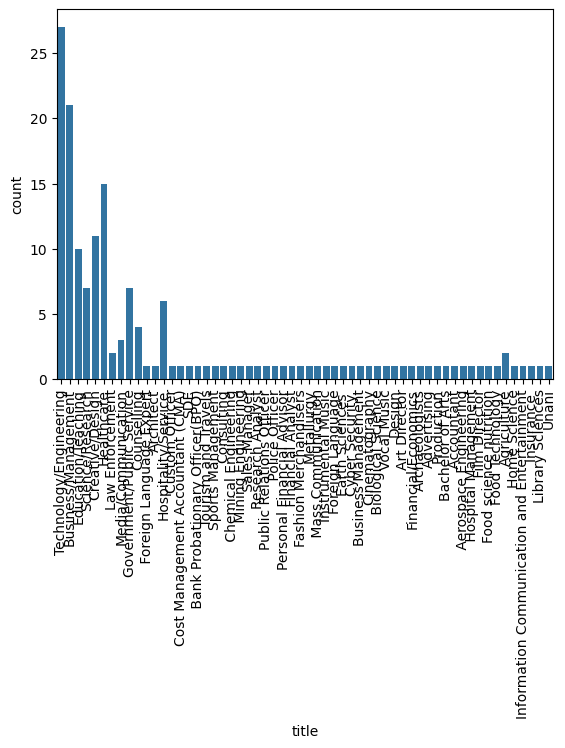

In [19]:
chart = sns.countplot(x=y_trans)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [20]:
X3 = sparse.csr_matrix.copy(X2)
y3 = y_trans.copy(deep=True)
X3.shape

(161, 431)

In [21]:
ros = RandomOverSampler(random_state=42)
X_ovs, y_ovs = ros.fit_resample(X3, y3)

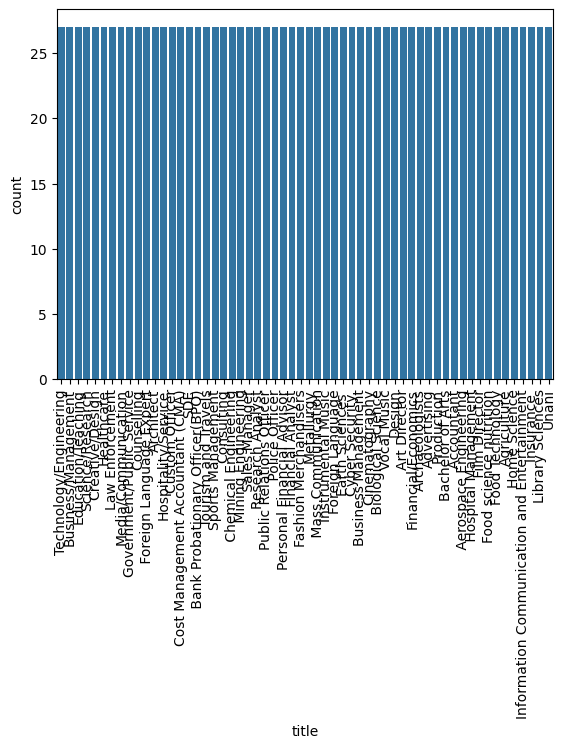

In [22]:
chart = sns.countplot(x=y_ovs)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [23]:
X_ovs.shape

(1566, 431)

In [24]:
y_ovs.shape

(1566,)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_ovs,y_ovs,test_size=0.2)

In [26]:
y_train.shape

(1252,)

In [27]:
clf = MLPClassifier(activation='tanh', hidden_layer_sizes = (50,50,50), solver = 'adam') #, random_state=1)
clf.fit(X_train,y_train)
print("Training Accuracy Score: ",accuracy_score(clf.predict(X_train),y_train))
print("Testing Accuracy Score: ",accuracy_score(clf.predict(X_test),y_test))

Training Accuracy Score:  1.0
Testing Accuracy Score:  0.9681528662420382


In [28]:
cm_train = confusion_matrix(clf.predict(X_train),y_train)
cm_test = confusion_matrix(clf.predict(X_test),y_test)
cm_train_cr = classification_report(clf.predict(X_train),y_train)
cm_test_cr = classification_report(clf.predict(X_test),y_test)
print("Train confusion matrix")
print(cm_train)
print("Test confusion matrix")
print(cm_test)
print("Train Classification Report")
print(cm_train_cr)
print("Test Classification Report")
print(cm_test_cr)
print("Train classwise accuracies")
print(cm_train.diagonal()/cm_train.sum(axis=1))
print("Test classwise accuracies")
print(cm_test.diagonal()/cm_test.sum(axis=1))

Train confusion matrix
[[20  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 22]]
Test confusion matrix
[[7 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 5]]
Train Classification Report
                                             precision    recall  f1-score   support

                                 Accountant       1.00      1.00      1.00        20
                      Aerospace Engineering       1.00      1.00      1.00        22
             Bank Probationary Officer(BPO)       1.00      1.00      1.00        23
                         Biological Science       1.00      1.00      1.00        22
                       Chemical Engineering       1.00      1.00      1.00        21
                              Film Director       1.00      1.00      1.00        24
                          Financial Analyst       1.00 

<Axes: >

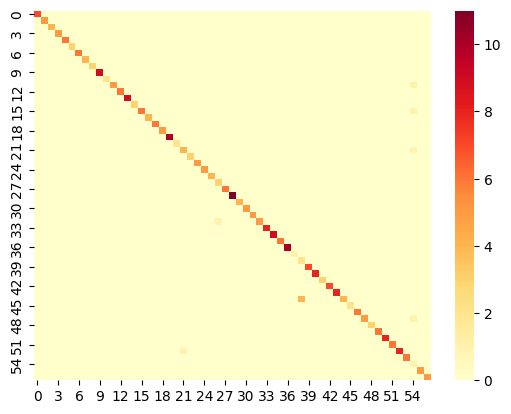

In [29]:
sns.heatmap(cm_test,linewidth=0.00001,cmap='YlOrRd')

In [30]:
pickle.dump(clf, open("final_model.h5", 'wb'))

In [31]:
x.iloc[-1]=[200,500,'ISTP',78,89,78,94,75,67,95,77,90,90,90,0,1,2,3]
x.index=x.index+1
x=x.sort_index()
x.shape

(161, 18)

In [32]:
new_data = OneHotEncoder().fit_transform(x)
new_data = StandardScaler(with_mean=False).fit_transform(new_data)
new_data = sparse.csr_matrix.copy(new_data)
new_data.shape

(161, 441)

In [33]:
output=clf.predict(new_data[0])
output

ValueError: X has 441 features, but MLPClassifier is expecting 431 features as input.

In [ ]:
pred_prob=clf.predict_proba(new_data[1])
pred_prob

ValueError: X has 443 features, but MLPClassifier is expecting 431 features as input.

In [ ]:
if output[0] == 'Technology/Engineering':
    cat=technology_and_engineering
elif output[0] == 'Healthcare':
    cat=healthcare_and_medicine
elif output[0] == 'Business/Management':
    cat=business_and_management
elif output[0] == 'Education/Teaching':
    cat=education_and_teaching
elif output[0] == 'Creative/Design':
    cat=creative_and_design
elif output[0] == 'Science/Research':
    cat=science_and_research
elif output[0] == 'Law Enforcement':
    cat=legal_and_law_enforcement
elif output[0] == 'Media/Communication':
    cat=media_and_communication
elif output[0] == 'Hospitality/Service':
    cat=hospitality_and_service_industry
elif output[0] == 'Financial/Economics':
    cat=financial_and_economic_analysis
elif output[0] == 'Wellness':
    cat=health_and_wellness
elif output[0] == 'SDE':
    cat=it_and_computer_systems
elif output[0] == 'Agriculture':
    cat=agriculture_and_environmental
elif output[0] == 'Counselling':
    cat=social_services_and_counseling
elif output[0] == 'Logistics/Supply Chain':
    cat=logistics_and_supply_chain_management
elif output[0] == 'Production':
    cat=manufacturing_and_production
elif output[0] == 'Sales':
    cat=retail_and_sales
elif output[0] == 'Construction':
    cat=engineering_and_construction
elif output[0] == 'Consulting':
    cat=consulting_and_advisory_services
elif output[0] == 'Government/Public Service':
    cat=government_and_public_service

NameError: name 'output' is not defined

In [ ]:
print("Suggested Career Category : '",output[0],"'")
print()
print("Possible Career Track in specified category : ")
for i in cat:
    print(i)

NameError: name 'output' is not defined